# CS541: Applied Machine Learning, Spring 2025, Lab 6

Lab 5 is an exercise that explores Regression and regularization. Linear regression is a supervised machine-learning algorithm that learns from the labelled datasets and maps the data points to the most optimized linear functions, it can be used for prediction on new dataset.

We will be working with some Linear regression models and utilizing regularization to see if we can improve performance of our models.

**Lab Grading**

Labs are hands-on exercises designed to provide guided experience in key concepts through this class.  You are graded based on in-lab participation (not correctness), and **are required to submit** your lab work after class, before Friday of that week.  *Make sure you fill out the attendence form before leaving class*.

For students who miss a lab, you can submit a make-up lab on gradescope by the Friday directly following the lab for partial credit.  Please see the syllabus for the lab grading policy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### First we start of with creating a regression dataset

In [2]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
X, y = make_regression(n_samples=10000, n_features=2, noise=10, random_state=42)

In [3]:
print(X.shape)
print(X[:5])

(10000, 2)
[[-0.5691482   1.59040357]
 [ 0.73487779  0.49097495]
 [ 0.20069869  1.10623156]
 [-1.07774393 -0.54427443]
 [ 0.10507597 -0.88502863]]


In [4]:
print(y.shape)
print(y[:5])
print(np.max(y))
print(np.min(y))

(10000,)
[ -52.11926507   72.08630572   14.36776966 -101.35500791    6.67196789]
448.3252123801228
-361.4639340336066


### We plot out what we expect the target values would look like based on the two different features

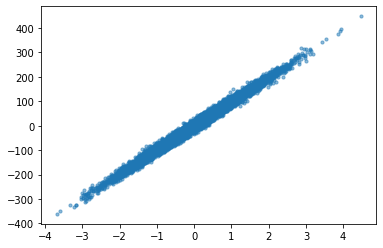

In [5]:
plt.scatter(X[:, 0],y, s=10, alpha=0.5);

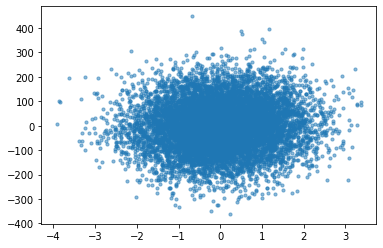

In [6]:
plt.scatter(X[:, 1],y, s=10, alpha=0.5);

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=99)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [8]:
# Build a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_pred = linear_model.predict(X_train)
linear_mse = mean_squared_error(y_train, linear_pred)
print(f"Linear Regression MSE: {linear_mse:.2f}")

linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print(f"Linear Regression MSE: {linear_mse:.2f}")

Linear Regression MSE: 98.66
Linear Regression MSE: 97.45


We saw our model didn't perform too bad, but let's see what happens if we try and use different versions of regression

In [9]:
# Build a Lasso regression model
lasso_model = Lasso(alpha=.1) # Adjust the alpha value for more or less regularization

#Fit your lasso_model to your train data
lasso_model.fit(X_train, y_train)
#Use your lasso_model to predict on your train data
lasso_pred = lasso_model.predict(X_train)
#Calculate the MSE on your y_train
lasso_mse = mean_squared_error(y_train, lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse:.2f}")

#Use your lasso_model to predict on your test data
lasso_pred = lasso_model.predict(X_test)
#Calculate the MSE on your y_test
# lasso_pred = lasso_model
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse:.2f}")



Lasso Regression MSE: 98.68
Lasso Regression MSE: 97.37


In [10]:
# Build a Ridge regression model with Linear least squares with l2 regularization
ridge_model =  Ridge(alpha=0.1)  # Adjust the alpha value for more or less regularization
#Fit your ridge_model to your train data
ridge_model.fit(X_train, y_train)
#Use your ridge to predict on your train data
ridge_pred = ridge_model.predict(X_train)
ridge_mse = mean_squared_error(y_train, ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse:.2f}")
#Use your ridge to predict on your test data
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse:.2f}")

Ridge Regression MSE: 98.66
Ridge Regression MSE: 97.45


In [11]:
# Load the California dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Let's look at the data

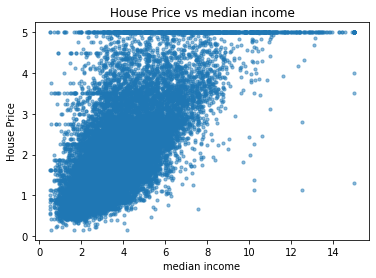

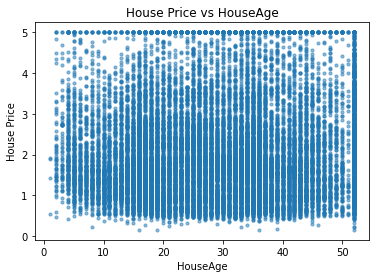

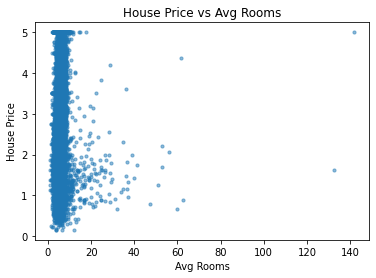

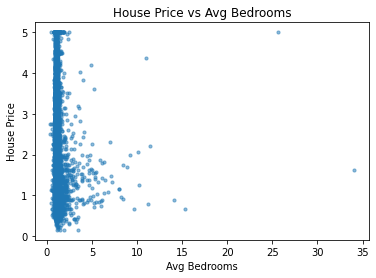

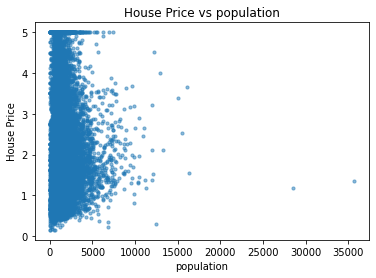

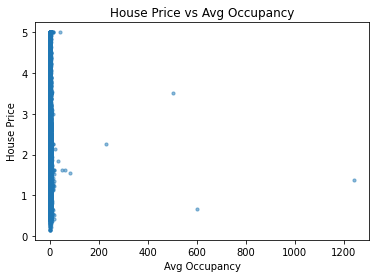

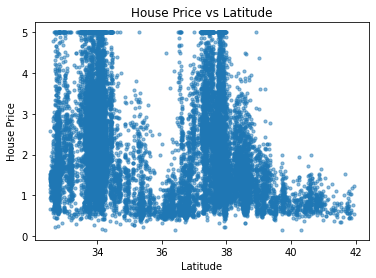

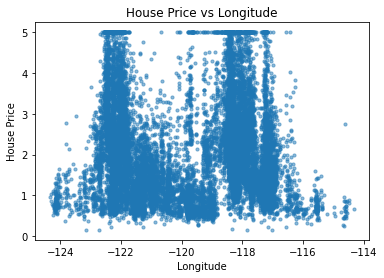

In [12]:
features = [
    "median income",
    "HouseAge",
    "Avg Rooms",
    "Avg Bedrooms",
    "population",
    "Avg Occupancy",
    "Latitude",
    "Longitude"
]
for i in range(X.shape[1]):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, i], y, s=10, alpha=0.5)
    plt.title(f"House Price vs {features[i]}")
    plt.xlabel(features[i])
    plt.ylabel('House Price')
    plt.show()

### Let's build a regression model to predict the prices

In [13]:
# Build a linear regression model
linear_model = LinearRegression()
#Fit your linear model to your train data
linear_model.fit(X_train, y_train)
#Use your linear_model to predict on your train data
linear_pred = linear_model.predict(X_train)
#Calculate the MSE on your train data
linear_mse = mean_squared_error(y_train, linear_pred)
print(f"Linear Regression MSE: {linear_mse:.2f}")
#Use your linear_model to predict on your test data
linear_pred = linear_model.predict(X_test)
#Calculate the MSE on your test data
linear_mse = mean_squared_error(y_test, linear_pred)
print(f"Linear Regression MSE: {linear_mse:.2f}")



Linear Regression MSE: 0.52
Linear Regression MSE: 0.53


### Maybe, we need a more complicated model?

In [14]:
# Augment the feature matrix to include polynomial features, look at sklearn and use an include_bias=False
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

In [15]:
X_train.shape

(14448, 44)

In [16]:
# Build a linear regression model
linear_model = LinearRegression()
#Fit your linear model to your train data
linear_model.fit(X_train, y_train)
#Use your linear_model to predict on your train data
linear_pred = linear_model.predict(X_train)
#Calculate the MSE on your train data
linear_mse = mean_squared_error(y_train, linear_pred)
print(f"Linear Regression MSE with a more complicated model: {linear_mse:.2f}")
#Use your linear_model to predict on your test data
linear_pred = linear_model.predict(X_test)
#Calculate the MSE on your test data
linear_mse = mean_squared_error(y_test, linear_pred)
print(f"Linear Regression MSE with a more complicated model: {linear_mse:.2f}")



Linear Regression MSE with a more complicated model: 0.42
Linear Regression MSE with a more complicated model: 0.45


### What if we increase the complexity, but then regularize the model?

This will penalize the model if it over-uses the complicated higher order polynomial features.

In [17]:
# Build a Lasso regression model
lasso_model = Lasso(alpha=0.1) # Adjust the alpha value for more or less regularization

#Fit your lasso_model to your train data
lasso_model.fit(X_train, y_train)
#Use your lasso_model to predict on your train data
lasso_pred = lasso_model.predict(X_train)
#Calculate the MSE on your y_train
lasso_mse = mean_squared_error(y_train, lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse:.2f}")

#Use your lasso_model to predict on your test data
lasso_pred = lasso_model.predict(X_test)
#Calculate the MSE on your y_test
# lasso_pred = lasso_model
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse:.2f}")

Lasso Regression MSE: 0.48
Lasso Regression MSE: 0.47


/Users/themistoklis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.514e+03, tolerance: 1.936e+00
  model = cd_fast.enet_coordinate_descent(


In [18]:
ridge_model = Ridge(alpha=0.1)  # Adjust the alpha value for more or less regularization
#Fit your ridge_model to your train data
ridge_model.fit(X_train, y_train)
#Use your ridge to predict on your train data
ridge_pred = ridge_model.predict(X_train)
ridge_mse = mean_squared_error(y_train, ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse:.2f}")
#Use your ridge to predict on your test data
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse:.2f}")

Ridge Regression MSE: 0.43
Ridge Regression MSE: 0.43


/Users/themistoklis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.17263e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### Challenge: What's the least number of features we can use to still get a decent performance?



In [19]:
# Augment the feature matrix to include polynomial features, look at sklearn and use an include_bias=False
# try degree ranging from 2-4
poly = PolynomialFeatures(degree=3, include_bias=False)
#Try to fit your poly to some columns
X_poly = poly.fit_transform(X[:, :1])
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

In [20]:
# Build a Lasso regression model
lasso_model = Lasso(alpha=0.1) # Adjust the alpha value for more or less regularization

#Fit your lasso_model to your train data
lasso_model.fit(X_train, y_train)
#Use your lasso_model to predict on your train data
lasso_pred = lasso_model.predict(X_train)
#Calculate the MSE on your y_train
lasso_mse = mean_squared_error(y_train, lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse:.2f}")

#Use your lasso_model to predict on your test data
lasso_pred = lasso_model.predict(X_test)
#Calculate the MSE on your y_test
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse:.2f}")

Lasso Regression MSE: 0.69
Lasso Regression MSE: 0.68


In [21]:
# Build a Ridge regression model, try and alpha ranging from 0.001 - 0.004
ridge_model = Ridge(alpha=0.002)  # Adjust the alpha value for more or less regularization
#Fit your ridge_model to your train data
ridge_model.fit(X_train, y_train)
#Use your ridge to predict on your train data
ridge_pred = ridge_model.predict(X_train)
ridge_mse = mean_squared_error(y_train, ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse:.2f}")
#Use your ridge to predict on your test data
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse:.2f}")

Ridge Regression MSE: 0.69
Ridge Regression MSE: 0.68


Let work on another real life Dataset, the Diabetes dataset

In [22]:
from sklearn.datasets import load_diabetes

In [23]:
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [24]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [25]:
# columns
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [26]:
X = diabetes.data
y = diabetes.target

In [27]:
X.shape, y.shape

((442, 10), (442,))

In [28]:
print(y[:5])

[151.  75. 141. 206. 135.]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
X_train.shape, y_train.shape

((309, 10), (309,))

In [31]:
# Build a linear regression model
linear_model = LinearRegression()
#Fit your linear model to your train data
linear_model.fit(X_train, y_train)
#Use your linear_model to predict on your train data
linear_pred = linear_model.predict(X_train)
#Calculate the MSE on your train data
linear_mse = mean_squared_error(y_train, linear_pred)
print(f"Linear Regression MSE: {linear_mse:.2f}")
#Use your linear_model to predict on your test data
linear_pred = linear_model.predict(X_test)
#Calculate the MSE on your test data
linear_mse = mean_squared_error(y_test, linear_pred)
print(f"Linear Regression MSE: {linear_mse:.2f}")



Linear Regression MSE: 2924.05
Linear Regression MSE: 2821.75


In [32]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : linear_pred})
result

,Actual,Predict
0,219.0,138.469700
1,70.0,181.100523
2,202.0,125.344009
3,230.0,292.759773
4,111.0,123.883053
...,...,...
128,257.0,202.997787
129,137.0,92.101004
130,63.0,122.288768
131,93.0,80.808670


In [33]:
# Augment the feature matrix to include polynomial features, look at sklearn and use an include_bias=False
# try degree ranging from 2-4
poly = PolynomialFeatures(degree=3, include_bias=False)
# Fit your poly to the train data
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

In [34]:
# Build a linear regression model
linear_model = LinearRegression()
#Fit your linear model to your train data
linear_model.fit(X_train, y_train)
#Use your linear_model to predict on your train data
linear_pred = linear_model.predict(X_train)
#Calculate the MSE on your train data
linear_mse = mean_squared_error(y_train, linear_pred)
print(f"Linear Regression MSE with a more complicated model: {linear_mse:.2f}")
#Use your linear_model to predict on your test data
linear_pred = linear_model.predict(X_test)
#Calculate the MSE on your test data
linear_mse = mean_squared_error(y_test, linear_pred)
print(f"Linear Regression MSE with a more complicated model: {linear_mse:.2f}")



Linear Regression MSE with a more complicated model: 462.82
Linear Regression MSE with a more complicated model: 501929.55


In [35]:
ridge_model = Ridge(alpha=0.01)  # Adjust the alpha value for more or less regularization
#Fit your ridge_model to your train data
ridge_model.fit(X_train, y_train)
#Use your ridge to predict on your train data
ridge_pred = ridge_model.predict(X_train)
ridge_mse = mean_squared_error(y_train, ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse:.2f}")
#Use your ridge to predict on your test data
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse:.2f}")

Ridge Regression MSE: 2805.29
Ridge Regression MSE: 2734.89


In [36]:
# Build a Lasso regression model
lasso_model = Lasso(alpha=0.01) # Adjust the alpha value for more or less

#Fit your lasso_model to your train data
lasso_model.fit(X_train, y_train)
#Use your lasso_model to predict on your train data
lasso_pred = lasso_model.predict(X_train)
#Calculate the MSE on your y_train
lasso_mse = mean_squared_error(y_train, lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse:.2f}")

#Use your lasso_model to predict on your test data
lasso_pred = lasso_model.predict(X_test)
#Calculate the MSE on your y_test
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse:.2f}")

Lasso Regression MSE: 2807.49
Lasso Regression MSE: 2674.30
